In [29]:
#####################################
# Developed by Baptiste PICARD      #
# picard.baptiste@laposte.net       #
# Started the 14th of April 2020    #
# picard.baptiste@laposte.net       #
#                                   #
# RANSAC and Hough implementation   #
#                                   #
#####################################

# Modules 
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

# Models 
from sklearn.linear_model import LinearRegression, RANSACRegressor

In [49]:
n_samples = 1000
n_outliers = 150

X, y = datasets.make_regression(n_samples=1000, n_features=1) # Create a sample of points / Generate a random regression problem.
print("Size of X : {} / Size of Y : {}".format(X.size, y.size))
new_x = X.copy()
new_y = y.copy()
index = np.random.choice(new_y.shape[0], n_outliers)
new_x[index] = new_x[index] * np.random.random_sample() 
new_y[index] = new_y[index] * np.random.random_sample() 

# Linear Regression
lr = LinearRegression()
lr.fit(new_x, new_y)
# Ransac Regression 
ransac = RANSACRegressor()
ransac.fit(new_x, new_y)

# Linear regression -> Prediction
reg_y = lr.predict(X)
# Ransac regression -> Prediction
ran_y = ransac.predict(X)

Size of X : 1000 / Size of Y : 1000


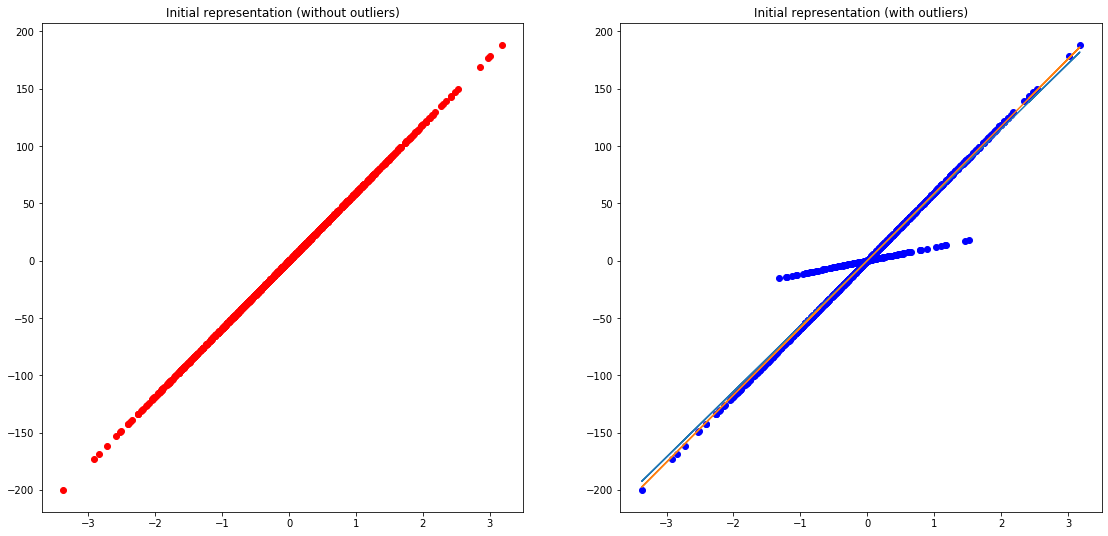

In [51]:
plt.figure(figsize=(19, 9))
plt.subplot(121)
plt.title('Initial representation (without outliers)')
plt.plot(X, y, 'ro')
plt.subplot(122)
plt.title('Initial representation (with outliers)')
plt.plot(new_x, new_y, 'bo')
plt.plot(X, reg_y)
plt.plot(X, ran_y)
plt.show()